## TO DO.

1. Guardar archivos después de hacer modificaciones tipo to_datetime (performance issues)
2. Tenía la intención de hacer un boxplot para ver un poco mejor como se comporta la duración de los viajes en cada día de la semana, pero no me está saliendo
3. Como el "objetivo del TP" es: predecir la duracion de los viajes mi idea es agregar: 
    * Graficos de duracion de los viajes en funcion de:
        + día de la semana (ya está)
        + hora del día
        + estacion
    * Tambien podriamos analizar como influye el clima en la duracion de los viajes, pero al haber bastantes datos f
    

In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('default') # Make the graphs a bit prettier
plt.rcParams['figure.figsize'] = (15, 5)

# ¿Tenemos datos no válidos?

In [2]:
def shape_and_null_values(file):
    print("str(file) shape: " + str(file.shape))
    print("Is null any?")
    print(str(file.isnull().any()))

In [4]:
trips = pd.read_csv('trip.csv')
shape_and_null_values(trips)

str(file) shape: (669959, 11)
Is null any?
id                    False
duration              False
start_date            False
start_station_name    False
start_station_id      False
end_date              False
end_station_name      False
end_station_id        False
bike_id               False
subscription_type     False
zip_code               True
dtype: bool


Se observa que en los códigos postales tenemos valores incompletos, no considero que sea un dato faltante clave para la realización del TP

In [5]:
stations = pd.read_csv('station.csv')
shape_and_null_values(stations)

str(file) shape: (70, 7)
Is null any?
id                   False
name                 False
lat                  False
long                 False
dock_count           False
city                 False
installation_date    False
dtype: bool


In [6]:
weather = pd.read_csv('weather.csv')
shape_and_null_values(weather)

str(file) shape: (3665, 24)
Is null any?
date                              False
max_temperature_f                  True
mean_temperature_f                 True
min_temperature_f                  True
max_dew_point_f                    True
mean_dew_point_f                   True
min_dew_point_f                    True
max_humidity                       True
mean_humidity                      True
min_humidity                       True
max_sea_level_pressure_inches      True
mean_sea_level_pressure_inches     True
min_sea_level_pressure_inches      True
max_visibility_miles               True
mean_visibility_miles              True
min_visibility_miles               True
max_wind_Speed_mph                 True
mean_wind_speed_mph                True
max_gust_speed_mph                 True
precipitation_inches               True
cloud_cover                        True
events                             True
wind_dir_degrees                   True
zip_code                          False

In [7]:
#Convertir fechas a datetime

trips['start_date'] = pd.to_datetime(trips['start_date'])
trips['end_date'] = pd.to_datetime(trips['end_date'])

# Cual es la estacion de donde salen mas viajes?

In [8]:
trips['start_station_name'].value_counts()[:5]

San Francisco Caltrain (Townsend at 4th)         49092
San Francisco Caltrain 2 (330 Townsend)          33742
Harry Bridges Plaza (Ferry Building)             32934
Embarcadero at Sansome                           27713
Temporary Transbay Terminal (Howard at Beale)    26089
Name: start_station_name, dtype: int64

# Como varia la cantidad de viajes segun el dia de la semana?

In [9]:
trips['day_of_week'] = trips['start_date'].dt.dayofweek

In [10]:
trips.dtypes

id                             int64
duration                       int64
start_date            datetime64[ns]
start_station_name            object
start_station_id               int64
end_date              datetime64[ns]
end_station_name              object
end_station_id                 int64
bike_id                        int64
subscription_type             object
zip_code                      object
day_of_week                    int64
dtype: object

In [11]:
trips.sample()

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,subscription_type,zip_code,day_of_week
572499,569961,1905,2014-12-08 15:52:00,Embarcadero at Folsom,51,2014-12-08 16:23:00,Embarcadero at Sansome,60,506,Customer,55960,0


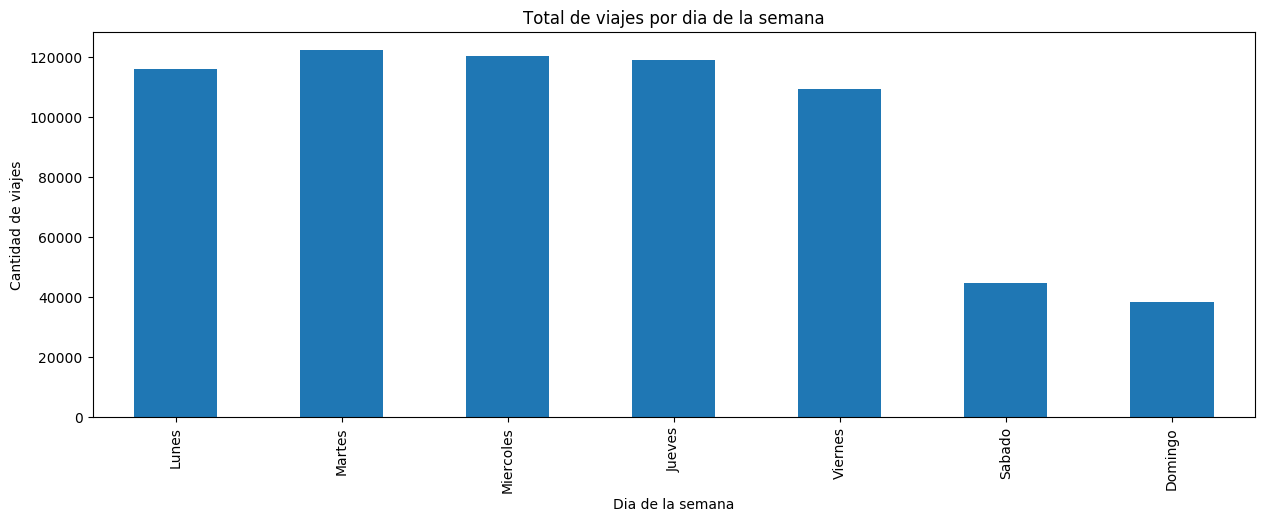

In [41]:
plt.figure()

trips_by_day_count = trips['day_of_week'].value_counts().sort_index()
trips_by_day_count.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
plt.title('Total de viajes por dia de la semana')
plt.xlabel('Dia de la semana')
plt.ylabel('Cantidad de viajes')

trips_by_day_count.plot('bar');

## ¿Qué tipos de subscripciones existen?

In [14]:
suscriptors = trips.groupby('subscription_type').agg('count')
suscriptors

,id,duration,start_date,start_station_name,start_station_id,end_date,end_station_name,end_station_id,bike_id,zip_code,day_of_week
subscription_type,,,,,,,,,,,
Customer,103213,103213,103213,103213,103213,103213,103213,103213,103213,96594,103213
Subscriber,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746,566746


# Los "Customers" tienden a estar mas los fines de semana?

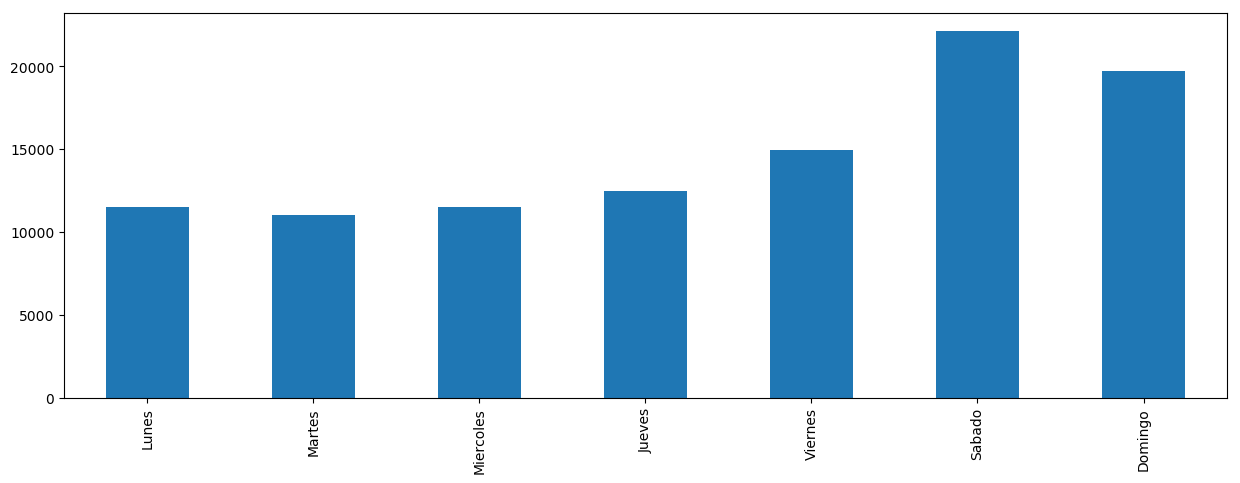

In [16]:
customers_trips_by_day = trips.loc[trips['subscription_type'] == 'Customer',['day_of_week']]['day_of_week'].value_counts().sort_index()
customers_trips_by_day.index = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
customers_trips_by_day.plot('bar')


# En promedio, la duracion de los viajes en la semana es constante? Las personas van al trabajo en bicicleta?

In [18]:
def getNames(seriesOfNumbers):
    names = []
    days = ['Lunes','Martes','Miercoles','Jueves','Viernes','Sabado','Domingo']
    
    for numDay in seriesOfNumbers:
        names.append(days[numDay])
    return names

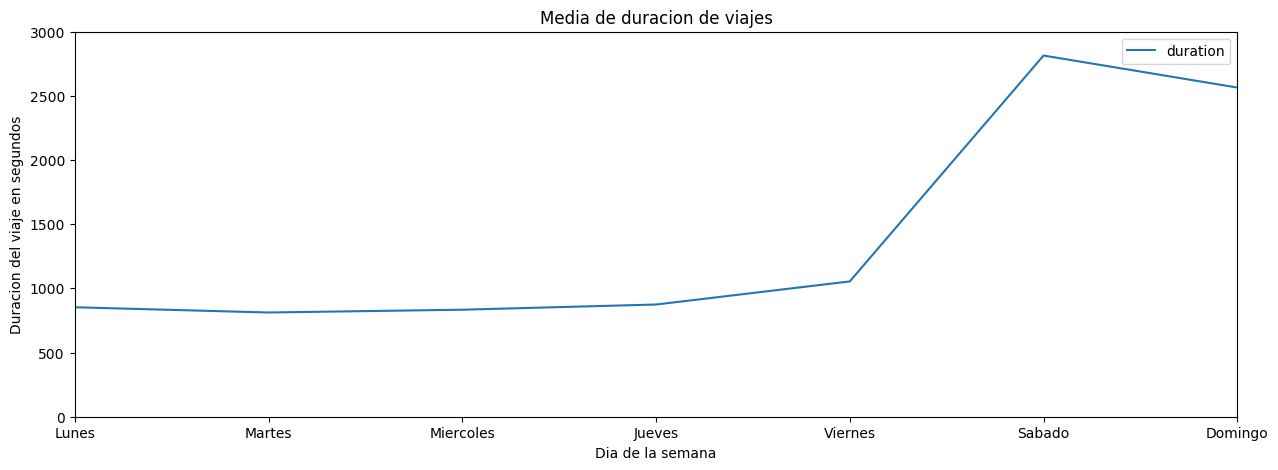

In [44]:
tripsByDayAndDuration = trips.loc[:,['day_of_week','duration']].sort_values('day_of_week')
tripsByDayAndDuration = tripsByDayAndDuration.groupby('day_of_week').mean().reset_index()
tripsByDayAndDuration['day_of_week'] = tripsByDayAndDuration[['day_of_week']].apply(lambda dates: getNames(dates))
tripsByDayAndDuration.plot('day_of_week','duration',ylim=(0,3000))
plt.title('Media de duracion de viajes')
plt.xlabel('Dia de la semana')
plt.ylabel('Duracion del viaje en segundos')

In [ ]:
# en la semana la duracion deberia ser constante, si se concidera que las personas van al trabajo/colegio en bicicleta
# si se filtran los "costumers" dejando los suscriptos...

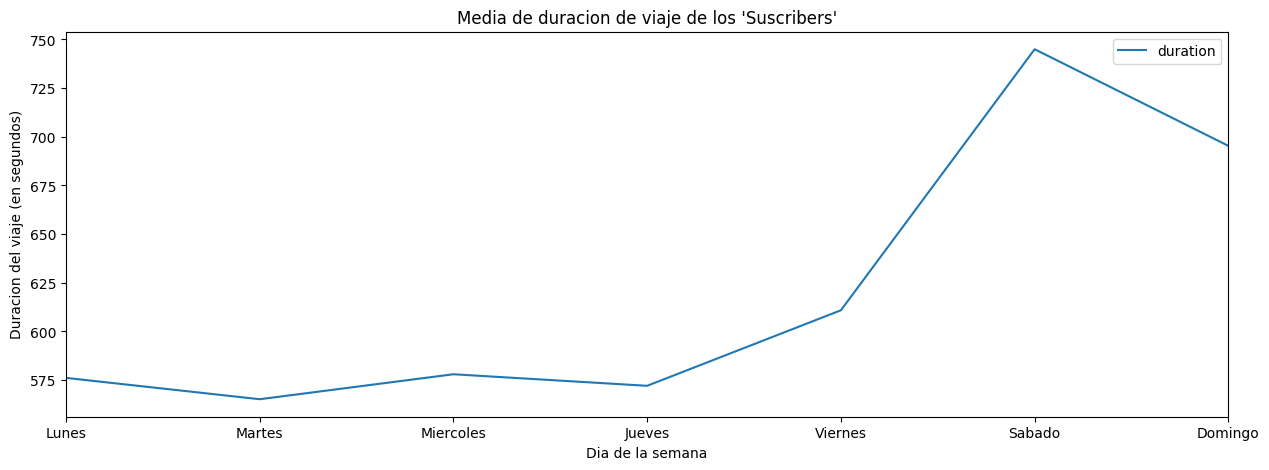

In [48]:
subscriptors_trips = trips.loc[trips.subscription_type == 'Subscriber',['day_of_week','duration']]
subscriptors_trips = subscriptors_trips.groupby('day_of_week').mean().reset_index()
subscriptors_trips['day_of_week'] = subscriptors_trips[['day_of_week']].apply(lambda dates: getNames(dates))
subscriptors_trips.plot('day_of_week','duration')
plt.title('Media de duracion de viaje de los \'Suscribers\'')
plt.xlabel('Dia de la semana')
plt.ylabel('Duracion del viaje (en segundos)')

TypeError: unsupported operand type(s) for /: 'list' and 'int'

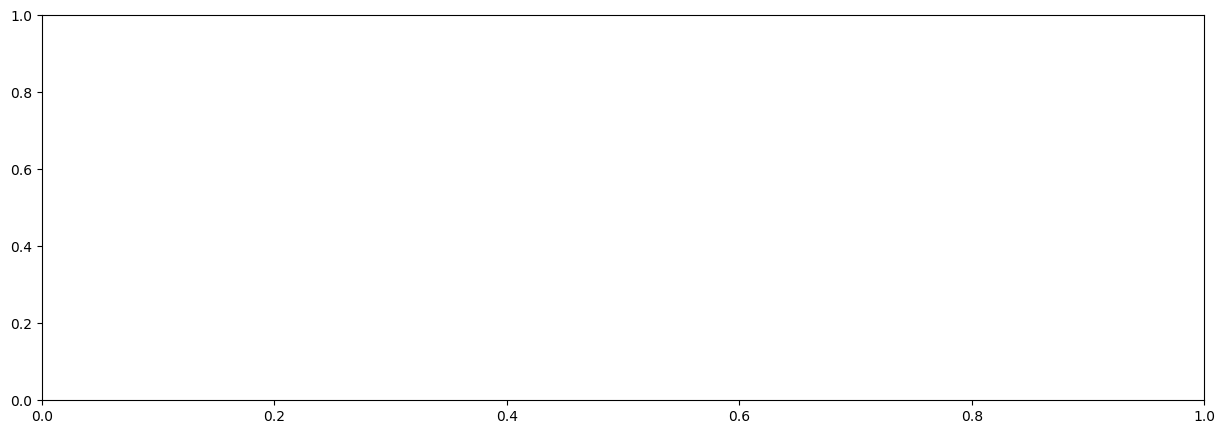

In [84]:
trips_by_day = trips.loc[:,['day_of_week','duration']].groupby('day_of_week')['duration'].apply(list)
#trips_by_day['day_of_week'] = trips_by_day[['day_of_week']].apply(lambda dates: getNames(dates))


# Como varían los viajes en función de la hora?

In [ ]:
trips['start_time'] = trips.start_date.dt.time
trips['start_date'] = trips.start_date.dt.date

In [ ]:
trips['end_time'] = trips.end_date.dt.time
trips['end_date'] = trips.end_date.dt.date
trips.sample()